In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Enable matplotline inline display
%matplotlib inline

# Import built-in modules
import os

# Import third party modules
import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, HTML
from skimage import color
from skimage import exposure
from skimage import morphology
from utils import get_files_from_dir
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from scipy.ndimage.morphology import binary_fill_holes


import matplotlib.patches as mpatches
np.seterr(divide='ignore', invalid='ignore')

path_mask = os.path.join('m1-results','week1','test','method1')
mask_filenames = get_files_from_dir(path_mask)




In [10]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Import built-in modules
import os

# Import third party modules
import imageio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

from skimage.measure import label, regionprops
from utils import get_files_from_dir
from utils import bboxes_to_file 

def connected_components(mask0, area_min=None, area_max=None, ff_min=None, ff_max=None, fr_min=None, 
                         plot=False, fname=None, directory=None):

    label_image = label(mask0)
    bbox_list = []
    
    if plot==True:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.imshow(mask0)

    for region in regionprops(label_image):
        
        minr, minc, maxr, maxc = region.bbox
        h = maxr - minr
        w = maxc - minc
        form_factor = w / h
        filling_ratio = region.filled_area / region.bbox_area

        # Filter by area:
        if area_min is not None and area_max is not None:
            if area_min <= region.bbox_area <= area_max:
                 minr, minc, maxr, maxc = region.bbox
            else:
                del(minr, minc, maxr, maxc)
                continue
                
        # Filter by form factor:
        if ff_min is not None and ff_max is not None:
            if ff_min < form_factor < ff_max:
                minr, minc, maxr, maxc = region.bbox
            else:
                del(minr, minc, maxr, maxc)
                continue
                
        # Filter by filling ratio:
        if fr_min is not None:
            if filling_ratio > fr_min:
                minr, minc, maxr, maxc = region.bbox
            else:
                del(minr, minc, maxr, maxc)
                continue
        
        bbox_list.append([minr, minc, maxr, maxc])
        
        if plot==True:

            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
    #plt.savefig('figures/filter_area_ff_fr_train.png')
            
    if fname is not None and directory is not None:
        bboxes_to_file(bbox_list, fname, directory, sign_types=None)
        
    return bbox_list
'''  
path_mask = os.path.join('m1-results','week1','test','method1')
mask_filenames = get_files_from_dir(path_mask)

for i in range(5):

    mask_i = imageio.imread(os.path.join(path_mask, mask_filenames[i]))

    mask0 = mask_i#binary_fill_holes(mask_i)

    #bbox_list_cc = connected_components(mask0, area_min=1000, area_max=50000, ff_min=0.5, ff_max=2, fr_min=0.5, 
                                        #plot=True, fname='bbox_prueba', directory='figures')
'''

"  \npath_mask = os.path.join('m1-results','week1','test','method1')\nmask_filenames = get_files_from_dir(path_mask)\n\nfor i in range(5):\n\n    mask_i = imageio.imread(os.path.join(path_mask, mask_filenames[i]))\n\n    mask0 = mask_i#binary_fill_holes(mask_i)\n\n    #bbox_list_cc = connected_components(mask0, area_min=1000, area_max=50000, ff_min=0.5, ff_max=2, fr_min=0.5, \n                                        #plot=True, fname='bbox_prueba', directory='figures')\n"

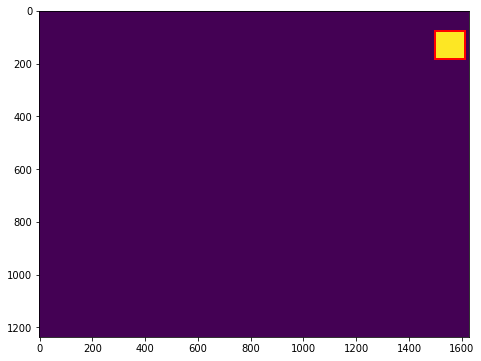

In [14]:
path_mask = os.path.join('dataset','train','mask')
mask_filenames = get_files_from_dir(path_mask)

for i in range(1):

    mask_i = imageio.imread(os.path.join(path_mask, mask_filenames[i]))

    mask0 = binary_fill_holes(mask_i)

    bbox_list_cc = connected_components(mask0, area_min=1000, area_max=50000, ff_min=0.5, ff_max=2, fr_min=0.5, 
                                        plot=True, fname='bbox_prueba', directory='figures')


In [13]:
print(len(bbox_list_cc))

#print(bbox_list_cc)

# No filter = 3925 Bboxes
# Filter area = 13
# Filter ff = 6
# Filter fr = 2

print(mask_filenames)

2
['01.003554.png', '01.003420.png', '01.002784.png', '01.002869.png', '01.003067.png', '01.003591.png', '01.003557.png', '01.003421.png', '01.003589.png', '01.002661.png', '01.003419.png', '01.002409.png', '01.002890.png', '01.002657.png', '01.001670.png', '01.001370.png', '01.003551.png', '01.003596.png', '01.003550.png', '01.003155.png', '01.003342.png', '01.002832.png', '01.002871.png', '01.003247.png', '01.003246.png', '01.003601.png', '01.003231.png', '01.003603.png', '01.003103.png', '01.003594.png', '01.002965.png', '01.002961.png', '01.003233.png', '01.003632.png', '01.002785.png', '01.003543.png', '01.003590.png', '01.002966.png', '01.003038.png', '01.003634.png', '01.003276.png', '01.003037.png', '01.003552.png', '01.002320.png', '01.002436.png', '01.002374.png', '01.003544.png', '01.002799.png', '01.003102.png', '01.003193.png', '01.002429.png', '01.003232.png', '01.003631.png', '01.002316.png', '01.003556.png', '01.003336.png', '01.003444.png', '01.003248.png', '01.003442.